# Image Classification
In this project, you'll classify images from the [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html).  The dataset consists of airplanes, dogs, cats, and other objects. You'll preprocess the images, then train a convolutional neural network on all the samples. The images need to be normalized and the labels need to be one-hot encoded.  You'll get to apply what you learned and build a convolutional, max pooling, dropout, and fully connected layers.  At the end, you'll get to see your neural network's predictions on the sample images.
## Get the Data
Run the following cell to download the [CIFAR-10 dataset for python](https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz).

In [1]:
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
from urllib.request import urlretrieve
from os.path import isfile, isdir
from tqdm import tqdm
import problem_unittests as tests
import tarfile

cifar10_dataset_folder_path = 'cifar-10-batches-py'

# Use Floyd's cifar-10 dataset if present
floyd_cifar10_location = '/input/cifar-10/python.tar.gz'
if isfile(floyd_cifar10_location):
    tar_gz_path = floyd_cifar10_location
else:
    tar_gz_path = 'cifar-10-python.tar.gz'

class DLProgress(tqdm):
    last_block = 0

    def hook(self, block_num=1, block_size=1, total_size=None):
        self.total = total_size
        self.update((block_num - self.last_block) * block_size)
        self.last_block = block_num

if not isfile(tar_gz_path):
    with DLProgress(unit='B', unit_scale=True, miniters=1, desc='CIFAR-10 Dataset') as pbar:
        urlretrieve(
            'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz',
            tar_gz_path,
            pbar.hook)

if not isdir(cifar10_dataset_folder_path):
    with tarfile.open(tar_gz_path) as tar:
        tar.extractall()
        tar.close()


tests.test_folder_path(cifar10_dataset_folder_path)

CIFAR-10 Dataset: 171MB [01:08, 2.50MB/s]                              


All files found!


## Explore the Data
The dataset is broken into batches to prevent your machine from running out of memory.  The CIFAR-10 dataset consists of 5 batches, named `data_batch_1`, `data_batch_2`, etc.. Each batch contains the labels and images that are one of the following:
* airplane
* automobile
* bird
* cat
* deer
* dog
* frog
* horse
* ship
* truck

Understanding a dataset is part of making predictions on the data.  Play around with the code cell below by changing the `batch_id` and `sample_id`. The `batch_id` is the id for a batch (1-5). The `sample_id` is the id for a image and label pair in the batch.

Ask yourself "What are all possible labels?", "What is the range of values for the image data?", "Are the labels in order or random?".  Answers to questions like these will help you preprocess the data and end up with better predictions.


Stats of batch 1:
Samples: 10000
Label Counts: {0: 1005, 1: 974, 2: 1032, 3: 1016, 4: 999, 5: 937, 6: 1030, 7: 1001, 8: 1025, 9: 981}
First 20 Labels: [6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6]

Example of Image 5:
Image - Min Value: 0 Max Value: 252
Image - Shape: (32, 32, 3)
Label - Label Id: 1 Name: automobile


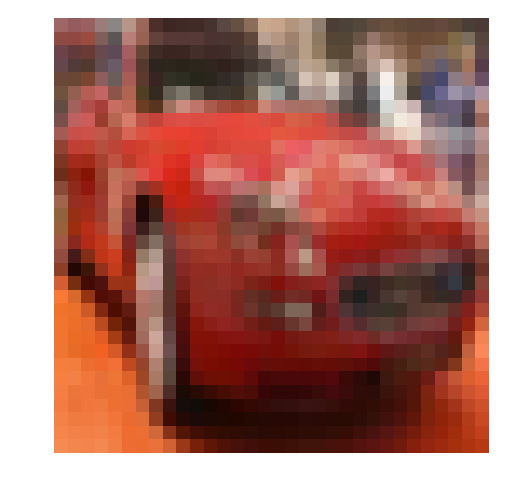

In [12]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper
import numpy as np

# Explore the dataset
batch_id = 1
sample_id = 5
helper.display_stats(cifar10_dataset_folder_path, batch_id, sample_id)

## Implement Preprocess Functions
### Normalize
In the cell below, implement the `normalize` function to take in image data, `x`, and return it as a normalized Numpy array. The values should be in the range of 0 to 1, inclusive.  The return object should be the same shape as `x`.

In [14]:
def normalize(x):
    """
    Normalize a list of sample image data in the range of 0 to 1
    : x: List of image data.  The image shape is (32, 32, 3)
    : return: Numpy array of normalize data
    """
    # TODO: Implement Function
    image_min = 0
    image_max = 255
    return (x - image_min)/(image_max - image_min ) 


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_normalize(normalize)

Tests Passed


### One-hot encode
Just like the previous code cell, you'll be implementing a function for preprocessing.  This time, you'll implement the `one_hot_encode` function. The input, `x`, are a list of labels.  Implement the function to return the list of labels as One-Hot encoded Numpy array.  The possible values for labels are 0 to 9. The one-hot encoding function should return the same encoding for each value between each call to `one_hot_encode`.  Make sure to save the map of encodings outside the function.

Hint: Don't reinvent the wheel.

In [15]:
def one_hot_encode(x):
    """
    One hot encode a list of sample labels. Return a one-hot encoded vector for each label.
    : x: List of sample Labels
    : return: Numpy array of one-hot encoded labels
    """
    # TODO: Implement Function
    nb_classes = 10
    one_hot_targets = np.eye(nb_classes)[x]
    return one_hot_targets


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_one_hot_encode(one_hot_encode)

Tests Passed


### Randomize Data
As you saw from exploring the data above, the order of the samples are randomized.  It doesn't hurt to randomize it again, but you don't need to for this dataset.

## Preprocess all the data and save it
Running the code cell below will preprocess all the CIFAR-10 data and save it to file. The code below also uses 10% of the training data for validation.

In [16]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
# Preprocess Training, Validation, and Testing Data
helper.preprocess_and_save_data(cifar10_dataset_folder_path, normalize, one_hot_encode)

# Check Point
This is your first checkpoint.  If you ever decide to come back to this notebook or have to restart the notebook, you can start from here.  The preprocessed data has been saved to disk.

In [1]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import pickle
import problem_unittests as tests
import helper

# Load the Preprocessed Validation data
valid_features, valid_labels = pickle.load(open('preprocess_validation.p', mode='rb'))

## Build the network
For the neural network, you'll build each layer into a function.  Most of the code you've seen has been outside of functions. To test your code more thoroughly, we require that you put each layer in a function.  This allows us to give you better feedback and test for simple mistakes using our unittests before you submit your project.

>**Note:** If you're finding it hard to dedicate enough time for this course each week, we've provided a small shortcut to this part of the project. In the next couple of problems, you'll have the option to use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages to build each layer, except the layers you build in the "Convolutional and Max Pooling Layer" section.  TF Layers is similar to Keras's and TFLearn's abstraction to layers, so it's easy to pickup.

>However, if you would like to get the most out of this course, try to solve all the problems _without_ using anything from the TF Layers packages. You **can** still use classes from other packages that happen to have the same name as ones you find in TF Layers! For example, instead of using the TF Layers version of the `conv2d` class, [tf.layers.conv2d](https://www.tensorflow.org/api_docs/python/tf/layers/conv2d), you would want to use the TF Neural Network version of `conv2d`, [tf.nn.conv2d](https://www.tensorflow.org/api_docs/python/tf/nn/conv2d). 

Let's begin!

### Input
The neural network needs to read the image data, one-hot encoded labels, and dropout keep probability. Implement the following functions
* Implement `neural_net_image_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `image_shape` with batch size set to `None`.
 * Name the TensorFlow placeholder "x" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_label_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `n_classes` with batch size set to `None`.
 * Name the TensorFlow placeholder "y" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_keep_prob_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder) for dropout keep probability.
 * Name the TensorFlow placeholder "keep_prob" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).

These names will be used at the end of the project to load your saved model.

Note: `None` for shapes in TensorFlow allow for a dynamic size.

In [2]:
import tensorflow as tf

def neural_net_image_input(image_shape):
    """
    Return a Tensor for a batch of image input
    : image_shape: Shape of the images
    : return: Tensor for image input.
    """
    # TODO: Implement Function
    return tf.placeholder(tf.float32, [None, *image_shape], name="x")


def neural_net_label_input(n_classes):
    """
    Return a Tensor for a batch of label input
    : n_classes: Number of classes
    : return: Tensor for label input.
    """
    # TODO: Implement Function
    return tf.placeholder(tf.float32, [None, n_classes], name="y")


def neural_net_keep_prob_input():
    """
    Return a Tensor for keep probability
    : return: Tensor for keep probability.
    """
    # TODO: Implement Function
    return tf.placeholder(tf.float32, name="keep_prob")


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tf.reset_default_graph()
tests.test_nn_image_inputs(neural_net_image_input)
tests.test_nn_label_inputs(neural_net_label_input)
tests.test_nn_keep_prob_inputs(neural_net_keep_prob_input)

Image Input Tests Passed.
Label Input Tests Passed.
Keep Prob Tests Passed.


### Convolution and Max Pooling Layer
Convolution layers have a lot of success with images. For this code cell, you should implement the function `conv2d_maxpool` to apply convolution then max pooling:
* Create the weight and bias using `conv_ksize`, `conv_num_outputs` and the shape of `x_tensor`.
* Apply a convolution to `x_tensor` using weight and `conv_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.
* Add bias
* Add a nonlinear activation to the convolution.
* Apply Max Pooling using `pool_ksize` and `pool_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.

**Note:** You **can't** use [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) for **this** layer, but you can still use TensorFlow's [Neural Network](https://www.tensorflow.org/api_docs/python/tf/nn) package. You may still use the shortcut option for all the **other** layers.

In [85]:
def conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides):
    """
    Apply convolution then max pooling to x_tensor
    :param x_tensor: TensorFlow Tensor
    :param conv_num_outputs: Number of outputs for the convolutional layer
    :param conv_ksize: kernal size 2-D Tuple for the convolutional layer
    :param conv_strides: Stride 2-D Tuple for convolution
    :param pool_ksize: kernal size 2-D Tuple for pool
    :param pool_strides: Stride 2-D Tuple for pool
    : return: A tensor that represents convolution and max pooling of x_tensor
    """
    # TODO: Implement Function
    # Filter (weights and bias)
    W_conv = tf.Variable(tf.truncated_normal((*conv_ksize, x_tensor.get_shape().as_list()[3], conv_num_outputs),
                                            stddev=0.1))
    b_conv = tf.Variable(tf.zeros(conv_num_outputs))
    padding = 'SAME'
    h_conv2d = tf.nn.relu(tf.nn.conv2d(x_tensor, W_conv, [1, *conv_strides, 1], padding) + b_conv)
    return tf.nn.max_pool(h_conv2d, [1, *pool_ksize, 1], [1, *pool_strides, 1], padding) 


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_con_pool(conv2d_maxpool)

Tests Passed


### Flatten Layer
Implement the `flatten` function to change the dimension of `x_tensor` from a 4-D tensor to a 2-D tensor.  The output should be the shape (*Batch Size*, *Flattened Image Size*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

In [86]:
def flatten(x_tensor):
    """
    Flatten x_tensor to (Batch Size, Flattened Image Size)
    : x_tensor: A tensor of size (Batch Size, ...), where ... are the image dimensions.
    : return: A tensor of size (Batch Size, Flattened Image Size).
    """
    # TODO: Implement Function
    image_shape = x_tensor.get_shape().as_list()
    return tf.reshape(x_tensor, [-1, image_shape[1]*image_shape[2]*image_shape[3]])


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_flatten(flatten)

Tests Passed


### Fully-Connected Layer
Implement the `fully_conn` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

In [87]:
def fully_conn(x_tensor, num_outputs):
    """
    Apply a fully connected layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # TODO: Implement Function
    W_fc1 = tf.Variable(tf.truncated_normal([x_tensor.get_shape().as_list()[1], num_outputs], stddev=0.1))
    b_fc1 = tf.Variable(tf.zeros([num_outputs]))

    return tf.nn.relu(tf.matmul(x_tensor, W_fc1) + b_fc1)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_fully_conn(fully_conn)

Tests Passed


### Output Layer
Implement the `output` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

**Note:** Activation, softmax, or cross entropy should **not** be applied to this.

In [88]:
def output(x_tensor, num_outputs):
    """
    Apply a output layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # TODO: Implement Function
    W_output = tf.Variable(tf.truncated_normal([x_tensor.get_shape().as_list()[1], num_outputs], stddev=0.1))
    b_output = tf.Variable(tf.zeros([num_outputs]))

    return tf.matmul(x_tensor, W_output) + b_output

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_output(output)

Tests Passed


### Create Convolutional Model
Implement the function `conv_net` to create a convolutional neural network model. The function takes in a batch of images, `x`, and outputs logits.  Use the layers you created above to create this model:

* Apply 1, 2, or 3 Convolution and Max Pool layers
* Apply a Flatten Layer
* Apply 1, 2, or 3 Fully Connected Layers
* Apply an Output Layer
* Return the output
* Apply [TensorFlow's Dropout](https://www.tensorflow.org/api_docs/python/tf/nn/dropout) to one or more layers in the model using `keep_prob`. 

In [134]:
def conv_net(x, keep_prob):
    """
    Create a convolutional neural network model
    : x: Placeholder tensor that holds image data.
    : keep_prob: Placeholder tensor that hold dropout keep probability.
    : return: Tensor that represents logits
    """
    # TODO: Apply 1, 2, or 3 Convolution and Max Pool layers
    #    Play around with different number of outputs, kernel size and stride
    # Function Definition from Above:
    #    conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)
    h_conv_maxpool1 = conv2d_maxpool(x, 32, [5, 5], [1, 1], [2, 2], [2, 2])
    h_conv_drop1 = tf.nn.dropout(h_conv_maxpool1, keep_prob)
    h_conv_maxpool2 = conv2d_maxpool(h_conv_drop1, 64, [5, 5], [1, 1], [2, 2], [2, 2])
    h_conv_drop2 = tf.nn.dropout(h_conv_maxpool2, keep_prob)
    h_conv_maxpool3 = conv2d_maxpool(h_conv_drop2, 128, [5, 5], [1, 1], [2, 2], [2, 2])
    h_conv_drop3 = tf.nn.dropout(h_conv_maxpool3, keep_prob)

    # TODO: Apply a Flatten Layer
    # Function Definition from Above:
    #   flatten(x_tensor)
    h_flatten = flatten(h_conv_drop3)
    

    # TODO: Apply 1, 2, or 3 Fully Connected Layers
    #    Play around with different number of outputs
    # Function Definition from Above:
    #   fully_conn(x_tensor, num_outputs)
    h_fc1 = fully_conn(h_flatten, 1024)
    h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)
    h_fc2 = fully_conn(h_fc1_drop, 1024)
    h_fc2_drop = tf.nn.dropout(h_fc2, keep_prob)
    h_fc3 = fully_conn(h_fc2_drop, 1024)
    h_fc3_drop = tf.nn.dropout(h_fc3, keep_prob)

    
    # TODO: Apply an Output Layer
    #    Set this to the number of classes
    # Function Definition from Above:
    #   output(x_tensor, num_outputs)
    y_conv = output(h_fc3_drop, num_outputs=10)
    
    # TODO: return output
    return y_conv


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""

##############################
## Build the Neural Network ##
##############################

# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

# Inputs
x = neural_net_image_input((32, 32, 3))
y = neural_net_label_input(10)
keep_prob = neural_net_keep_prob_input()

# Model
logits = conv_net(x, keep_prob)

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer().minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

tests.test_conv_net(conv_net)

Neural Network Built!


## Train the Neural Network
### Single Optimization
Implement the function `train_neural_network` to do a single optimization.  The optimization should use `optimizer` to optimize in `session` with a `feed_dict` of the following:
* `x` for image input
* `y` for labels
* `keep_prob` for keep probability for dropout

This function will be called for each batch, so `tf.global_variables_initializer()` has already been called.

Note: Nothing needs to be returned. This function is only optimizing the neural network.

In [135]:
def train_neural_network(session, optimizer, keep_probability, feature_batch, label_batch):
    """
    Optimize the session on a batch of images and labels
    : session: Current TensorFlow session
    : optimizer: TensorFlow optimizer function
    : keep_probability: keep probability
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    """
    # TODO: Implement Function
    session.run(optimizer, feed_dict={x: feature_batch, y: label_batch, keep_prob: keep_probability})

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_train_nn(train_neural_network)

Tests Passed


### Show Stats
Implement the function `print_stats` to print loss and validation accuracy.  Use the global variables `valid_features` and `valid_labels` to calculate validation accuracy.  Use a keep probability of `1.0` to calculate the loss and validation accuracy.

In [136]:
def print_stats(session, feature_batch, label_batch, cost, accuracy):
    """
    Print information about loss and validation accuracy
    : session: Current TensorFlow session
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    : cost: TensorFlow cost function
    : accuracy: TensorFlow accuracy function
    """
    # TODO: Implement Function
    l, train_accuracy = session.run([cost, accuracy], feed_dict={x: feature_batch, y: label_batch, keep_prob: 1.0})
    valid_accuracy = session.run(accuracy, feed_dict={x: valid_features, y: valid_labels, keep_prob: 1.0})
    print('loss %f, train_accuracy %g, valid accuracy %g' % (l, train_accuracy, valid_accuracy))

### Hyperparameters
Tune the following parameters:
* Set `epochs` to the number of iterations until the network stops learning or start overfitting
* Set `batch_size` to the highest number that your machine has memory for.  Most people set them to common sizes of memory:
 * 64
 * 128
 * 256
 * ...
* Set `keep_probability` to the probability of keeping a node using dropout

In [159]:
# TODO: Tune Parameters
epochs = 600
batch_size = 256
keep_probability = 0.6

### Train on a Single CIFAR-10 Batch
Instead of training the neural network on all the CIFAR-10 batches of data, let's use a single batch. This should save time while you iterate on the model to get a better accuracy.  Once the final validation accuracy is 50% or greater, run the model on all the data in the next section.

In [160]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)

Checking the Training on a Single Batch...
Epoch  1, CIFAR-10 Batch 1:  loss 2.312561, train_accuracy 0.15, valid accuracy 0.125
Epoch  2, CIFAR-10 Batch 1:  loss 2.300617, train_accuracy 0.075, valid accuracy 0.112
Epoch  3, CIFAR-10 Batch 1:  loss 2.305267, train_accuracy 0.05, valid accuracy 0.103
Epoch  4, CIFAR-10 Batch 1:  loss 2.314233, train_accuracy 0.1, valid accuracy 0.1016
Epoch  5, CIFAR-10 Batch 1:  loss 2.311855, train_accuracy 0.1, valid accuracy 0.097
Epoch  6, CIFAR-10 Batch 1:  loss 2.311517, train_accuracy 0.1, valid accuracy 0.095
Epoch  7, CIFAR-10 Batch 1:  loss 2.315464, train_accuracy 0.1, valid accuracy 0.0948
Epoch  8, CIFAR-10 Batch 1:  loss 2.324066, train_accuracy 0.1, valid accuracy 0.0946
Epoch  9, CIFAR-10 Batch 1:  loss 2.343038, train_accuracy 0.1, valid accuracy 0.0946
Epoch 10, CIFAR-10 Batch 1:  loss 2.362362, train_accuracy 0.1, valid accuracy 0.0946
Epoch 11, CIFAR-10 Batch 1:  loss 2.381929, train_accuracy 0.1, valid accuracy 0.0946
Epoch 12, CI

Epoch 95, CIFAR-10 Batch 1:  loss 1.479715, train_accuracy 0.4, valid accuracy 0.3972
Epoch 96, CIFAR-10 Batch 1:  loss 1.451247, train_accuracy 0.4, valid accuracy 0.4004
Epoch 97, CIFAR-10 Batch 1:  loss 1.491055, train_accuracy 0.45, valid accuracy 0.3944
Epoch 98, CIFAR-10 Batch 1:  loss 1.391663, train_accuracy 0.45, valid accuracy 0.4282
Epoch 99, CIFAR-10 Batch 1:  loss 1.477727, train_accuracy 0.4, valid accuracy 0.393
Epoch 100, CIFAR-10 Batch 1:  loss 1.366663, train_accuracy 0.475, valid accuracy 0.415
Epoch 101, CIFAR-10 Batch 1:  loss 1.347913, train_accuracy 0.5, valid accuracy 0.4298
Epoch 102, CIFAR-10 Batch 1:  loss 1.325369, train_accuracy 0.5, valid accuracy 0.431
Epoch 103, CIFAR-10 Batch 1:  loss 1.271630, train_accuracy 0.55, valid accuracy 0.4328
Epoch 104, CIFAR-10 Batch 1:  loss 1.309869, train_accuracy 0.5, valid accuracy 0.434
Epoch 105, CIFAR-10 Batch 1:  loss 1.348710, train_accuracy 0.5, valid accuracy 0.4072
Epoch 106, CIFAR-10 Batch 1:  loss 1.253899, tr

Epoch 189, CIFAR-10 Batch 1:  loss 0.525599, train_accuracy 0.925, valid accuracy 0.5584
Epoch 190, CIFAR-10 Batch 1:  loss 0.495244, train_accuracy 0.9, valid accuracy 0.5684
Epoch 191, CIFAR-10 Batch 1:  loss 0.476542, train_accuracy 0.9, valid accuracy 0.585
Epoch 192, CIFAR-10 Batch 1:  loss 0.518196, train_accuracy 0.9, valid accuracy 0.5574
Epoch 193, CIFAR-10 Batch 1:  loss 0.449511, train_accuracy 0.925, valid accuracy 0.5768
Epoch 194, CIFAR-10 Batch 1:  loss 0.473994, train_accuracy 0.9, valid accuracy 0.5756
Epoch 195, CIFAR-10 Batch 1:  loss 0.537782, train_accuracy 0.875, valid accuracy 0.5438
Epoch 196, CIFAR-10 Batch 1:  loss 0.436037, train_accuracy 0.925, valid accuracy 0.5852
Epoch 197, CIFAR-10 Batch 1:  loss 0.446965, train_accuracy 0.925, valid accuracy 0.576
Epoch 198, CIFAR-10 Batch 1:  loss 0.454484, train_accuracy 0.9, valid accuracy 0.5624
Epoch 199, CIFAR-10 Batch 1:  loss 0.444205, train_accuracy 0.9, valid accuracy 0.5456
Epoch 200, CIFAR-10 Batch 1:  loss 

Epoch 284, CIFAR-10 Batch 1:  loss 0.043596, train_accuracy 1, valid accuracy 0.6086
Epoch 285, CIFAR-10 Batch 1:  loss 0.028550, train_accuracy 1, valid accuracy 0.6426
Epoch 286, CIFAR-10 Batch 1:  loss 0.024009, train_accuracy 1, valid accuracy 0.6424
Epoch 287, CIFAR-10 Batch 1:  loss 0.036036, train_accuracy 1, valid accuracy 0.642
Epoch 288, CIFAR-10 Batch 1:  loss 0.037624, train_accuracy 1, valid accuracy 0.628
Epoch 289, CIFAR-10 Batch 1:  loss 0.035466, train_accuracy 1, valid accuracy 0.633
Epoch 290, CIFAR-10 Batch 1:  loss 0.032957, train_accuracy 1, valid accuracy 0.647
Epoch 291, CIFAR-10 Batch 1:  loss 0.035134, train_accuracy 1, valid accuracy 0.6428
Epoch 292, CIFAR-10 Batch 1:  loss 0.042568, train_accuracy 1, valid accuracy 0.6504
Epoch 293, CIFAR-10 Batch 1:  loss 0.036961, train_accuracy 1, valid accuracy 0.6412
Epoch 294, CIFAR-10 Batch 1:  loss 0.037030, train_accuracy 1, valid accuracy 0.6494
Epoch 295, CIFAR-10 Batch 1:  loss 0.031398, train_accuracy 1, valid 

Epoch 381, CIFAR-10 Batch 1:  loss 0.002426, train_accuracy 1, valid accuracy 0.6468
Epoch 382, CIFAR-10 Batch 1:  loss 0.002947, train_accuracy 1, valid accuracy 0.6566
Epoch 383, CIFAR-10 Batch 1:  loss 0.003225, train_accuracy 1, valid accuracy 0.6584
Epoch 384, CIFAR-10 Batch 1:  loss 0.001134, train_accuracy 1, valid accuracy 0.6422
Epoch 385, CIFAR-10 Batch 1:  loss 0.001690, train_accuracy 1, valid accuracy 0.6472
Epoch 386, CIFAR-10 Batch 1:  loss 0.003496, train_accuracy 1, valid accuracy 0.6486
Epoch 387, CIFAR-10 Batch 1:  loss 0.003133, train_accuracy 1, valid accuracy 0.6474
Epoch 388, CIFAR-10 Batch 1:  loss 0.002191, train_accuracy 1, valid accuracy 0.6542
Epoch 389, CIFAR-10 Batch 1:  loss 0.002814, train_accuracy 1, valid accuracy 0.6552
Epoch 390, CIFAR-10 Batch 1:  loss 0.002282, train_accuracy 1, valid accuracy 0.6558
Epoch 391, CIFAR-10 Batch 1:  loss 0.002976, train_accuracy 1, valid accuracy 0.6338
Epoch 392, CIFAR-10 Batch 1:  loss 0.002132, train_accuracy 1, va

Epoch 478, CIFAR-10 Batch 1:  loss 0.000983, train_accuracy 1, valid accuracy 0.6692
Epoch 479, CIFAR-10 Batch 1:  loss 0.000416, train_accuracy 1, valid accuracy 0.6618
Epoch 480, CIFAR-10 Batch 1:  loss 0.000666, train_accuracy 1, valid accuracy 0.6616
Epoch 481, CIFAR-10 Batch 1:  loss 0.001717, train_accuracy 1, valid accuracy 0.6466
Epoch 482, CIFAR-10 Batch 1:  loss 0.000954, train_accuracy 1, valid accuracy 0.6676
Epoch 483, CIFAR-10 Batch 1:  loss 0.000280, train_accuracy 1, valid accuracy 0.6648
Epoch 484, CIFAR-10 Batch 1:  loss 0.000315, train_accuracy 1, valid accuracy 0.6688
Epoch 485, CIFAR-10 Batch 1:  loss 0.000908, train_accuracy 1, valid accuracy 0.6622
Epoch 486, CIFAR-10 Batch 1:  loss 0.000757, train_accuracy 1, valid accuracy 0.6574
Epoch 487, CIFAR-10 Batch 1:  loss 0.000513, train_accuracy 1, valid accuracy 0.6618
Epoch 488, CIFAR-10 Batch 1:  loss 0.000408, train_accuracy 1, valid accuracy 0.6562
Epoch 489, CIFAR-10 Batch 1:  loss 0.000456, train_accuracy 1, va

Epoch 575, CIFAR-10 Batch 1:  loss 0.000056, train_accuracy 1, valid accuracy 0.667
Epoch 576, CIFAR-10 Batch 1:  loss 0.000073, train_accuracy 1, valid accuracy 0.6678
Epoch 577, CIFAR-10 Batch 1:  loss 0.000187, train_accuracy 1, valid accuracy 0.6686
Epoch 578, CIFAR-10 Batch 1:  loss 0.000117, train_accuracy 1, valid accuracy 0.6614
Epoch 579, CIFAR-10 Batch 1:  loss 0.000073, train_accuracy 1, valid accuracy 0.6774
Epoch 580, CIFAR-10 Batch 1:  loss 0.000107, train_accuracy 1, valid accuracy 0.6726
Epoch 581, CIFAR-10 Batch 1:  loss 0.000164, train_accuracy 1, valid accuracy 0.6688
Epoch 582, CIFAR-10 Batch 1:  loss 0.000124, train_accuracy 1, valid accuracy 0.677
Epoch 583, CIFAR-10 Batch 1:  loss 0.000521, train_accuracy 1, valid accuracy 0.67
Epoch 584, CIFAR-10 Batch 1:  loss 0.000151, train_accuracy 1, valid accuracy 0.6742
Epoch 585, CIFAR-10 Batch 1:  loss 0.000101, train_accuracy 1, valid accuracy 0.664
Epoch 586, CIFAR-10 Batch 1:  loss 0.000046, train_accuracy 1, valid a

### Fully Train the Model
Now that you got a good accuracy with a single CIFAR-10 batch, try it with all five batches.

In [161]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
save_model_path = './image_classification'

print('Training...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        # Loop over all batches
        n_batches = 5
        for batch_i in range(1, n_batches + 1):
            for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
                train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
            print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
            print_stats(sess, batch_features, batch_labels, cost, accuracy)
            
    # Save Model
    saver = tf.train.Saver()
    save_path = saver.save(sess, save_model_path)

Training...
Epoch  1, CIFAR-10 Batch 1:  loss 2.271044, train_accuracy 0.175, valid accuracy 0.134
Epoch  1, CIFAR-10 Batch 2:  loss 2.334074, train_accuracy 0.05, valid accuracy 0.0946
Epoch  1, CIFAR-10 Batch 3:  loss 2.319691, train_accuracy 0.05, valid accuracy 0.0946
Epoch  1, CIFAR-10 Batch 4:  loss 2.285172, train_accuracy 0.15, valid accuracy 0.0946
Epoch  1, CIFAR-10 Batch 5:  loss 2.306232, train_accuracy 0.1, valid accuracy 0.0946
Epoch  2, CIFAR-10 Batch 1:  loss 2.307927, train_accuracy 0.1, valid accuracy 0.0946
Epoch  2, CIFAR-10 Batch 2:  loss 2.307360, train_accuracy 0.05, valid accuracy 0.0946
Epoch  2, CIFAR-10 Batch 3:  loss 2.310335, train_accuracy 0.05, valid accuracy 0.0946
Epoch  2, CIFAR-10 Batch 4:  loss 2.286575, train_accuracy 0.15, valid accuracy 0.0946
Epoch  2, CIFAR-10 Batch 5:  loss 2.313197, train_accuracy 0.1, valid accuracy 0.0946
Epoch  3, CIFAR-10 Batch 1:  loss 2.321627, train_accuracy 0.1, valid accuracy 0.0946
Epoch  3, CIFAR-10 Batch 2:  loss 2

Epoch 20, CIFAR-10 Batch 1:  loss 1.876846, train_accuracy 0.35, valid accuracy 0.3732
Epoch 20, CIFAR-10 Batch 2:  loss 1.695452, train_accuracy 0.325, valid accuracy 0.3526
Epoch 20, CIFAR-10 Batch 3:  loss 1.681953, train_accuracy 0.45, valid accuracy 0.3548
Epoch 20, CIFAR-10 Batch 4:  loss 1.750260, train_accuracy 0.35, valid accuracy 0.344
Epoch 20, CIFAR-10 Batch 5:  loss 1.785180, train_accuracy 0.35, valid accuracy 0.3528
Epoch 21, CIFAR-10 Batch 1:  loss 1.802564, train_accuracy 0.375, valid accuracy 0.4086
Epoch 21, CIFAR-10 Batch 2:  loss 1.751834, train_accuracy 0.3, valid accuracy 0.3188
Epoch 21, CIFAR-10 Batch 3:  loss 1.567519, train_accuracy 0.375, valid accuracy 0.3978
Epoch 21, CIFAR-10 Batch 4:  loss 1.654115, train_accuracy 0.425, valid accuracy 0.3906
Epoch 21, CIFAR-10 Batch 5:  loss 1.763160, train_accuracy 0.475, valid accuracy 0.3396
Epoch 22, CIFAR-10 Batch 1:  loss 1.721428, train_accuracy 0.4, valid accuracy 0.4288
Epoch 22, CIFAR-10 Batch 2:  loss 1.66206

Epoch 39, CIFAR-10 Batch 1:  loss 1.143540, train_accuracy 0.6, valid accuracy 0.5498
Epoch 39, CIFAR-10 Batch 2:  loss 1.178898, train_accuracy 0.525, valid accuracy 0.557
Epoch 39, CIFAR-10 Batch 3:  loss 1.217030, train_accuracy 0.5, valid accuracy 0.5298
Epoch 39, CIFAR-10 Batch 4:  loss 0.992664, train_accuracy 0.7, valid accuracy 0.5716
Epoch 39, CIFAR-10 Batch 5:  loss 1.162126, train_accuracy 0.6, valid accuracy 0.5086
Epoch 40, CIFAR-10 Batch 1:  loss 1.158829, train_accuracy 0.525, valid accuracy 0.5612
Epoch 40, CIFAR-10 Batch 2:  loss 1.247941, train_accuracy 0.5, valid accuracy 0.5496
Epoch 40, CIFAR-10 Batch 3:  loss 1.158469, train_accuracy 0.5, valid accuracy 0.5356
Epoch 40, CIFAR-10 Batch 4:  loss 0.947233, train_accuracy 0.7, valid accuracy 0.5898
Epoch 40, CIFAR-10 Batch 5:  loss 1.048439, train_accuracy 0.65, valid accuracy 0.544
Epoch 41, CIFAR-10 Batch 1:  loss 1.125670, train_accuracy 0.55, valid accuracy 0.5666
Epoch 41, CIFAR-10 Batch 2:  loss 1.152957, train_

Epoch 58, CIFAR-10 Batch 1:  loss 0.604290, train_accuracy 0.75, valid accuracy 0.6762
Epoch 58, CIFAR-10 Batch 2:  loss 0.641316, train_accuracy 0.825, valid accuracy 0.658
Epoch 58, CIFAR-10 Batch 3:  loss 0.684759, train_accuracy 0.75, valid accuracy 0.634
Epoch 58, CIFAR-10 Batch 4:  loss 0.631951, train_accuracy 0.825, valid accuracy 0.6372
Epoch 58, CIFAR-10 Batch 5:  loss 0.591599, train_accuracy 0.875, valid accuracy 0.6626
Epoch 59, CIFAR-10 Batch 1:  loss 0.645560, train_accuracy 0.75, valid accuracy 0.675
Epoch 59, CIFAR-10 Batch 2:  loss 0.634261, train_accuracy 0.825, valid accuracy 0.6468
Epoch 59, CIFAR-10 Batch 3:  loss 0.664659, train_accuracy 0.8, valid accuracy 0.6446
Epoch 59, CIFAR-10 Batch 4:  loss 0.537345, train_accuracy 0.85, valid accuracy 0.6682
Epoch 59, CIFAR-10 Batch 5:  loss 0.646416, train_accuracy 0.825, valid accuracy 0.6552
Epoch 60, CIFAR-10 Batch 1:  loss 0.597867, train_accuracy 0.825, valid accuracy 0.6788
Epoch 60, CIFAR-10 Batch 2:  loss 0.65304

Epoch 77, CIFAR-10 Batch 1:  loss 0.438713, train_accuracy 0.9, valid accuracy 0.7098
Epoch 77, CIFAR-10 Batch 2:  loss 0.353128, train_accuracy 0.95, valid accuracy 0.7086
Epoch 77, CIFAR-10 Batch 3:  loss 0.343943, train_accuracy 0.95, valid accuracy 0.7032
Epoch 77, CIFAR-10 Batch 4:  loss 0.349678, train_accuracy 0.925, valid accuracy 0.7022
Epoch 77, CIFAR-10 Batch 5:  loss 0.268707, train_accuracy 1, valid accuracy 0.7222
Epoch 78, CIFAR-10 Batch 1:  loss 0.389804, train_accuracy 0.9, valid accuracy 0.7198
Epoch 78, CIFAR-10 Batch 2:  loss 0.315393, train_accuracy 0.975, valid accuracy 0.7166
Epoch 78, CIFAR-10 Batch 3:  loss 0.331260, train_accuracy 0.95, valid accuracy 0.7106
Epoch 78, CIFAR-10 Batch 4:  loss 0.326001, train_accuracy 0.925, valid accuracy 0.7036
Epoch 78, CIFAR-10 Batch 5:  loss 0.273141, train_accuracy 0.975, valid accuracy 0.7074
Epoch 79, CIFAR-10 Batch 1:  loss 0.388199, train_accuracy 0.925, valid accuracy 0.7186
Epoch 79, CIFAR-10 Batch 2:  loss 0.319482,

Epoch 96, CIFAR-10 Batch 1:  loss 0.246748, train_accuracy 0.975, valid accuracy 0.7618
Epoch 96, CIFAR-10 Batch 2:  loss 0.187309, train_accuracy 0.975, valid accuracy 0.7356
Epoch 96, CIFAR-10 Batch 3:  loss 0.164537, train_accuracy 1, valid accuracy 0.7498
Epoch 96, CIFAR-10 Batch 4:  loss 0.220719, train_accuracy 0.95, valid accuracy 0.733
Epoch 96, CIFAR-10 Batch 5:  loss 0.158058, train_accuracy 1, valid accuracy 0.7576
Epoch 97, CIFAR-10 Batch 1:  loss 0.234221, train_accuracy 0.975, valid accuracy 0.7538
Epoch 97, CIFAR-10 Batch 2:  loss 0.210890, train_accuracy 0.975, valid accuracy 0.7484
Epoch 97, CIFAR-10 Batch 3:  loss 0.171037, train_accuracy 1, valid accuracy 0.7376
Epoch 97, CIFAR-10 Batch 4:  loss 0.210297, train_accuracy 0.975, valid accuracy 0.7412
Epoch 97, CIFAR-10 Batch 5:  loss 0.174516, train_accuracy 1, valid accuracy 0.7374
Epoch 98, CIFAR-10 Batch 1:  loss 0.215604, train_accuracy 0.95, valid accuracy 0.7512
Epoch 98, CIFAR-10 Batch 2:  loss 0.207287, train_a

Epoch 115, CIFAR-10 Batch 2:  loss 0.139380, train_accuracy 1, valid accuracy 0.7262
Epoch 115, CIFAR-10 Batch 3:  loss 0.161087, train_accuracy 1, valid accuracy 0.72
Epoch 115, CIFAR-10 Batch 4:  loss 0.146779, train_accuracy 1, valid accuracy 0.765
Epoch 115, CIFAR-10 Batch 5:  loss 0.103279, train_accuracy 1, valid accuracy 0.7614
Epoch 116, CIFAR-10 Batch 1:  loss 0.124400, train_accuracy 1, valid accuracy 0.7604
Epoch 116, CIFAR-10 Batch 2:  loss 0.119178, train_accuracy 1, valid accuracy 0.7514
Epoch 116, CIFAR-10 Batch 3:  loss 0.144206, train_accuracy 1, valid accuracy 0.7552
Epoch 116, CIFAR-10 Batch 4:  loss 0.129640, train_accuracy 1, valid accuracy 0.757
Epoch 116, CIFAR-10 Batch 5:  loss 0.084232, train_accuracy 1, valid accuracy 0.7706
Epoch 117, CIFAR-10 Batch 1:  loss 0.119316, train_accuracy 1, valid accuracy 0.7608
Epoch 117, CIFAR-10 Batch 2:  loss 0.085422, train_accuracy 1, valid accuracy 0.7708
Epoch 117, CIFAR-10 Batch 3:  loss 0.130962, train_accuracy 1, valid 

Epoch 134, CIFAR-10 Batch 4:  loss 0.093242, train_accuracy 1, valid accuracy 0.762
Epoch 134, CIFAR-10 Batch 5:  loss 0.049847, train_accuracy 1, valid accuracy 0.774
Epoch 135, CIFAR-10 Batch 1:  loss 0.082924, train_accuracy 1, valid accuracy 0.7654
Epoch 135, CIFAR-10 Batch 2:  loss 0.048733, train_accuracy 1, valid accuracy 0.7402
Epoch 135, CIFAR-10 Batch 3:  loss 0.061726, train_accuracy 1, valid accuracy 0.7638
Epoch 135, CIFAR-10 Batch 4:  loss 0.073138, train_accuracy 1, valid accuracy 0.7768
Epoch 135, CIFAR-10 Batch 5:  loss 0.071892, train_accuracy 1, valid accuracy 0.7544
Epoch 136, CIFAR-10 Batch 1:  loss 0.076867, train_accuracy 1, valid accuracy 0.771
Epoch 136, CIFAR-10 Batch 2:  loss 0.035729, train_accuracy 1, valid accuracy 0.7696
Epoch 136, CIFAR-10 Batch 3:  loss 0.076245, train_accuracy 1, valid accuracy 0.7654
Epoch 136, CIFAR-10 Batch 4:  loss 0.061655, train_accuracy 1, valid accuracy 0.7838
Epoch 136, CIFAR-10 Batch 5:  loss 0.077607, train_accuracy 1, valid

Epoch 154, CIFAR-10 Batch 1:  loss 0.034135, train_accuracy 1, valid accuracy 0.7822
Epoch 154, CIFAR-10 Batch 2:  loss 0.022310, train_accuracy 1, valid accuracy 0.7788
Epoch 154, CIFAR-10 Batch 3:  loss 0.034123, train_accuracy 1, valid accuracy 0.7724
Epoch 154, CIFAR-10 Batch 4:  loss 0.039459, train_accuracy 1, valid accuracy 0.7838
Epoch 154, CIFAR-10 Batch 5:  loss 0.045504, train_accuracy 1, valid accuracy 0.7688
Epoch 155, CIFAR-10 Batch 1:  loss 0.041743, train_accuracy 1, valid accuracy 0.7812
Epoch 155, CIFAR-10 Batch 2:  loss 0.042963, train_accuracy 1, valid accuracy 0.7664
Epoch 155, CIFAR-10 Batch 3:  loss 0.031257, train_accuracy 1, valid accuracy 0.7846
Epoch 155, CIFAR-10 Batch 4:  loss 0.034852, train_accuracy 1, valid accuracy 0.7772
Epoch 155, CIFAR-10 Batch 5:  loss 0.038767, train_accuracy 1, valid accuracy 0.7692
Epoch 156, CIFAR-10 Batch 1:  loss 0.038363, train_accuracy 1, valid accuracy 0.7826
Epoch 156, CIFAR-10 Batch 2:  loss 0.024972, train_accuracy 1, va

Epoch 173, CIFAR-10 Batch 3:  loss 0.028213, train_accuracy 1, valid accuracy 0.7824
Epoch 173, CIFAR-10 Batch 4:  loss 0.044686, train_accuracy 1, valid accuracy 0.7618
Epoch 173, CIFAR-10 Batch 5:  loss 0.022713, train_accuracy 1, valid accuracy 0.7674
Epoch 174, CIFAR-10 Batch 1:  loss 0.033169, train_accuracy 1, valid accuracy 0.7946
Epoch 174, CIFAR-10 Batch 2:  loss 0.028017, train_accuracy 1, valid accuracy 0.7768
Epoch 174, CIFAR-10 Batch 3:  loss 0.018478, train_accuracy 1, valid accuracy 0.786
Epoch 174, CIFAR-10 Batch 4:  loss 0.034992, train_accuracy 1, valid accuracy 0.7888
Epoch 174, CIFAR-10 Batch 5:  loss 0.029810, train_accuracy 1, valid accuracy 0.7654
Epoch 175, CIFAR-10 Batch 1:  loss 0.110487, train_accuracy 0.975, valid accuracy 0.7692
Epoch 175, CIFAR-10 Batch 2:  loss 0.011297, train_accuracy 1, valid accuracy 0.7818
Epoch 175, CIFAR-10 Batch 3:  loss 0.042072, train_accuracy 1, valid accuracy 0.7712
Epoch 175, CIFAR-10 Batch 4:  loss 0.040785, train_accuracy 1,

Epoch 192, CIFAR-10 Batch 5:  loss 0.033762, train_accuracy 1, valid accuracy 0.761
Epoch 193, CIFAR-10 Batch 1:  loss 0.037994, train_accuracy 1, valid accuracy 0.7684
Epoch 193, CIFAR-10 Batch 2:  loss 0.017489, train_accuracy 1, valid accuracy 0.7828
Epoch 193, CIFAR-10 Batch 3:  loss 0.028277, train_accuracy 1, valid accuracy 0.7858
Epoch 193, CIFAR-10 Batch 4:  loss 0.041885, train_accuracy 0.975, valid accuracy 0.7764
Epoch 193, CIFAR-10 Batch 5:  loss 0.019729, train_accuracy 1, valid accuracy 0.7764
Epoch 194, CIFAR-10 Batch 1:  loss 0.022182, train_accuracy 1, valid accuracy 0.796
Epoch 194, CIFAR-10 Batch 2:  loss 0.031619, train_accuracy 1, valid accuracy 0.7724
Epoch 194, CIFAR-10 Batch 3:  loss 0.020820, train_accuracy 1, valid accuracy 0.7796
Epoch 194, CIFAR-10 Batch 4:  loss 0.027712, train_accuracy 1, valid accuracy 0.7898
Epoch 194, CIFAR-10 Batch 5:  loss 0.017687, train_accuracy 1, valid accuracy 0.7748
Epoch 195, CIFAR-10 Batch 1:  loss 0.010922, train_accuracy 1, 

Epoch 212, CIFAR-10 Batch 2:  loss 0.010567, train_accuracy 1, valid accuracy 0.7946
Epoch 212, CIFAR-10 Batch 3:  loss 0.008539, train_accuracy 1, valid accuracy 0.7888
Epoch 212, CIFAR-10 Batch 4:  loss 0.013698, train_accuracy 1, valid accuracy 0.7972
Epoch 212, CIFAR-10 Batch 5:  loss 0.036382, train_accuracy 1, valid accuracy 0.759
Epoch 213, CIFAR-10 Batch 1:  loss 0.013316, train_accuracy 1, valid accuracy 0.79
Epoch 213, CIFAR-10 Batch 2:  loss 0.017202, train_accuracy 1, valid accuracy 0.7914
Epoch 213, CIFAR-10 Batch 3:  loss 0.013302, train_accuracy 1, valid accuracy 0.7788
Epoch 213, CIFAR-10 Batch 4:  loss 0.012021, train_accuracy 1, valid accuracy 0.797
Epoch 213, CIFAR-10 Batch 5:  loss 0.025058, train_accuracy 1, valid accuracy 0.7734
Epoch 214, CIFAR-10 Batch 1:  loss 0.016635, train_accuracy 1, valid accuracy 0.7898
Epoch 214, CIFAR-10 Batch 2:  loss 0.017989, train_accuracy 1, valid accuracy 0.78
Epoch 214, CIFAR-10 Batch 3:  loss 0.014254, train_accuracy 1, valid ac

Epoch 231, CIFAR-10 Batch 4:  loss 0.006219, train_accuracy 1, valid accuracy 0.799
Epoch 231, CIFAR-10 Batch 5:  loss 0.009377, train_accuracy 1, valid accuracy 0.7906
Epoch 232, CIFAR-10 Batch 1:  loss 0.012435, train_accuracy 1, valid accuracy 0.7902
Epoch 232, CIFAR-10 Batch 2:  loss 0.006399, train_accuracy 1, valid accuracy 0.7952
Epoch 232, CIFAR-10 Batch 3:  loss 0.005835, train_accuracy 1, valid accuracy 0.7916
Epoch 232, CIFAR-10 Batch 4:  loss 0.007505, train_accuracy 1, valid accuracy 0.8004
Epoch 232, CIFAR-10 Batch 5:  loss 0.016445, train_accuracy 1, valid accuracy 0.7762
Epoch 233, CIFAR-10 Batch 1:  loss 0.015440, train_accuracy 1, valid accuracy 0.7856
Epoch 233, CIFAR-10 Batch 2:  loss 0.004423, train_accuracy 1, valid accuracy 0.8056
Epoch 233, CIFAR-10 Batch 3:  loss 0.016805, train_accuracy 1, valid accuracy 0.7832
Epoch 233, CIFAR-10 Batch 4:  loss 0.008069, train_accuracy 1, valid accuracy 0.7954
Epoch 233, CIFAR-10 Batch 5:  loss 0.007734, train_accuracy 1, val

Epoch 251, CIFAR-10 Batch 1:  loss 0.004527, train_accuracy 1, valid accuracy 0.8068
Epoch 251, CIFAR-10 Batch 2:  loss 0.002281, train_accuracy 1, valid accuracy 0.7946
Epoch 251, CIFAR-10 Batch 3:  loss 0.007804, train_accuracy 1, valid accuracy 0.7916
Epoch 251, CIFAR-10 Batch 4:  loss 0.011874, train_accuracy 1, valid accuracy 0.7986
Epoch 251, CIFAR-10 Batch 5:  loss 0.015506, train_accuracy 1, valid accuracy 0.781
Epoch 252, CIFAR-10 Batch 1:  loss 0.005943, train_accuracy 1, valid accuracy 0.7932
Epoch 252, CIFAR-10 Batch 2:  loss 0.008019, train_accuracy 1, valid accuracy 0.7934
Epoch 252, CIFAR-10 Batch 3:  loss 0.007399, train_accuracy 1, valid accuracy 0.7854
Epoch 252, CIFAR-10 Batch 4:  loss 0.002959, train_accuracy 1, valid accuracy 0.7926
Epoch 252, CIFAR-10 Batch 5:  loss 0.022994, train_accuracy 1, valid accuracy 0.7744
Epoch 253, CIFAR-10 Batch 1:  loss 0.005579, train_accuracy 1, valid accuracy 0.7976
Epoch 253, CIFAR-10 Batch 2:  loss 0.006365, train_accuracy 1, val

Epoch 270, CIFAR-10 Batch 3:  loss 0.002119, train_accuracy 1, valid accuracy 0.7892
Epoch 270, CIFAR-10 Batch 4:  loss 0.004449, train_accuracy 1, valid accuracy 0.7992
Epoch 270, CIFAR-10 Batch 5:  loss 0.004162, train_accuracy 1, valid accuracy 0.7952
Epoch 271, CIFAR-10 Batch 1:  loss 0.006403, train_accuracy 1, valid accuracy 0.795
Epoch 271, CIFAR-10 Batch 2:  loss 0.004564, train_accuracy 1, valid accuracy 0.791
Epoch 271, CIFAR-10 Batch 3:  loss 0.005282, train_accuracy 1, valid accuracy 0.7942
Epoch 271, CIFAR-10 Batch 4:  loss 0.003873, train_accuracy 1, valid accuracy 0.7988
Epoch 271, CIFAR-10 Batch 5:  loss 0.003321, train_accuracy 1, valid accuracy 0.8016
Epoch 272, CIFAR-10 Batch 1:  loss 0.006888, train_accuracy 1, valid accuracy 0.7774
Epoch 272, CIFAR-10 Batch 2:  loss 0.004139, train_accuracy 1, valid accuracy 0.7962
Epoch 272, CIFAR-10 Batch 3:  loss 0.011524, train_accuracy 1, valid accuracy 0.7788
Epoch 272, CIFAR-10 Batch 4:  loss 0.005966, train_accuracy 1, vali

Epoch 289, CIFAR-10 Batch 5:  loss 0.002581, train_accuracy 1, valid accuracy 0.7898
Epoch 290, CIFAR-10 Batch 1:  loss 0.001601, train_accuracy 1, valid accuracy 0.7956
Epoch 290, CIFAR-10 Batch 2:  loss 0.004271, train_accuracy 1, valid accuracy 0.7988
Epoch 290, CIFAR-10 Batch 3:  loss 0.006244, train_accuracy 1, valid accuracy 0.7918
Epoch 290, CIFAR-10 Batch 4:  loss 0.004590, train_accuracy 1, valid accuracy 0.7946
Epoch 290, CIFAR-10 Batch 5:  loss 0.003973, train_accuracy 1, valid accuracy 0.7988
Epoch 291, CIFAR-10 Batch 1:  loss 0.002912, train_accuracy 1, valid accuracy 0.797
Epoch 291, CIFAR-10 Batch 2:  loss 0.003211, train_accuracy 1, valid accuracy 0.7966
Epoch 291, CIFAR-10 Batch 3:  loss 0.001866, train_accuracy 1, valid accuracy 0.7918
Epoch 291, CIFAR-10 Batch 4:  loss 0.005113, train_accuracy 1, valid accuracy 0.7938
Epoch 291, CIFAR-10 Batch 5:  loss 0.004462, train_accuracy 1, valid accuracy 0.7874
Epoch 292, CIFAR-10 Batch 1:  loss 0.002418, train_accuracy 1, val

Epoch 309, CIFAR-10 Batch 2:  loss 0.003379, train_accuracy 1, valid accuracy 0.7896
Epoch 309, CIFAR-10 Batch 3:  loss 0.002478, train_accuracy 1, valid accuracy 0.7958
Epoch 309, CIFAR-10 Batch 4:  loss 0.003771, train_accuracy 1, valid accuracy 0.7998
Epoch 309, CIFAR-10 Batch 5:  loss 0.005978, train_accuracy 1, valid accuracy 0.7846
Epoch 310, CIFAR-10 Batch 1:  loss 0.003129, train_accuracy 1, valid accuracy 0.7966
Epoch 310, CIFAR-10 Batch 2:  loss 0.002788, train_accuracy 1, valid accuracy 0.8008
Epoch 310, CIFAR-10 Batch 3:  loss 0.004070, train_accuracy 1, valid accuracy 0.7928
Epoch 310, CIFAR-10 Batch 4:  loss 0.008327, train_accuracy 1, valid accuracy 0.8016
Epoch 310, CIFAR-10 Batch 5:  loss 0.000772, train_accuracy 1, valid accuracy 0.8004
Epoch 311, CIFAR-10 Batch 1:  loss 0.001306, train_accuracy 1, valid accuracy 0.7966
Epoch 311, CIFAR-10 Batch 2:  loss 0.001475, train_accuracy 1, valid accuracy 0.8092
Epoch 311, CIFAR-10 Batch 3:  loss 0.001738, train_accuracy 1, va

Epoch 328, CIFAR-10 Batch 4:  loss 0.002386, train_accuracy 1, valid accuracy 0.8036
Epoch 328, CIFAR-10 Batch 5:  loss 0.000988, train_accuracy 1, valid accuracy 0.8078
Epoch 329, CIFAR-10 Batch 1:  loss 0.011776, train_accuracy 1, valid accuracy 0.787
Epoch 329, CIFAR-10 Batch 2:  loss 0.001320, train_accuracy 1, valid accuracy 0.798
Epoch 329, CIFAR-10 Batch 3:  loss 0.002309, train_accuracy 1, valid accuracy 0.7964
Epoch 329, CIFAR-10 Batch 4:  loss 0.004171, train_accuracy 1, valid accuracy 0.7878
Epoch 329, CIFAR-10 Batch 5:  loss 0.002334, train_accuracy 1, valid accuracy 0.8024
Epoch 330, CIFAR-10 Batch 1:  loss 0.002157, train_accuracy 1, valid accuracy 0.7984
Epoch 330, CIFAR-10 Batch 2:  loss 0.006828, train_accuracy 1, valid accuracy 0.7882
Epoch 330, CIFAR-10 Batch 3:  loss 0.002724, train_accuracy 1, valid accuracy 0.7968
Epoch 330, CIFAR-10 Batch 4:  loss 0.002798, train_accuracy 1, valid accuracy 0.8008
Epoch 330, CIFAR-10 Batch 5:  loss 0.000712, train_accuracy 1, vali

Epoch 348, CIFAR-10 Batch 1:  loss 0.000973, train_accuracy 1, valid accuracy 0.8034
Epoch 348, CIFAR-10 Batch 2:  loss 0.002540, train_accuracy 1, valid accuracy 0.8034
Epoch 348, CIFAR-10 Batch 3:  loss 0.001488, train_accuracy 1, valid accuracy 0.7988
Epoch 348, CIFAR-10 Batch 4:  loss 0.002983, train_accuracy 1, valid accuracy 0.8102
Epoch 348, CIFAR-10 Batch 5:  loss 0.002236, train_accuracy 1, valid accuracy 0.794
Epoch 349, CIFAR-10 Batch 1:  loss 0.002571, train_accuracy 1, valid accuracy 0.808
Epoch 349, CIFAR-10 Batch 2:  loss 0.002150, train_accuracy 1, valid accuracy 0.7798
Epoch 349, CIFAR-10 Batch 3:  loss 0.000958, train_accuracy 1, valid accuracy 0.7958
Epoch 349, CIFAR-10 Batch 4:  loss 0.004445, train_accuracy 1, valid accuracy 0.8078
Epoch 349, CIFAR-10 Batch 5:  loss 0.002456, train_accuracy 1, valid accuracy 0.797
Epoch 350, CIFAR-10 Batch 1:  loss 0.002417, train_accuracy 1, valid accuracy 0.8018
Epoch 350, CIFAR-10 Batch 2:  loss 0.008382, train_accuracy 1, valid

Epoch 367, CIFAR-10 Batch 3:  loss 0.001196, train_accuracy 1, valid accuracy 0.8052
Epoch 367, CIFAR-10 Batch 4:  loss 0.003313, train_accuracy 1, valid accuracy 0.7992
Epoch 367, CIFAR-10 Batch 5:  loss 0.000537, train_accuracy 1, valid accuracy 0.8048
Epoch 368, CIFAR-10 Batch 1:  loss 0.000744, train_accuracy 1, valid accuracy 0.8064
Epoch 368, CIFAR-10 Batch 2:  loss 0.000599, train_accuracy 1, valid accuracy 0.805
Epoch 368, CIFAR-10 Batch 3:  loss 0.000892, train_accuracy 1, valid accuracy 0.809
Epoch 368, CIFAR-10 Batch 4:  loss 0.002171, train_accuracy 1, valid accuracy 0.798
Epoch 368, CIFAR-10 Batch 5:  loss 0.001365, train_accuracy 1, valid accuracy 0.8096
Epoch 369, CIFAR-10 Batch 1:  loss 0.000693, train_accuracy 1, valid accuracy 0.8112
Epoch 369, CIFAR-10 Batch 2:  loss 0.002661, train_accuracy 1, valid accuracy 0.807
Epoch 369, CIFAR-10 Batch 3:  loss 0.001380, train_accuracy 1, valid accuracy 0.8116
Epoch 369, CIFAR-10 Batch 4:  loss 0.002227, train_accuracy 1, valid 

Epoch 386, CIFAR-10 Batch 5:  loss 0.000721, train_accuracy 1, valid accuracy 0.7966
Epoch 387, CIFAR-10 Batch 1:  loss 0.001079, train_accuracy 1, valid accuracy 0.8044
Epoch 387, CIFAR-10 Batch 2:  loss 0.002011, train_accuracy 1, valid accuracy 0.7932
Epoch 387, CIFAR-10 Batch 3:  loss 0.000308, train_accuracy 1, valid accuracy 0.8042
Epoch 387, CIFAR-10 Batch 4:  loss 0.001377, train_accuracy 1, valid accuracy 0.8044
Epoch 387, CIFAR-10 Batch 5:  loss 0.001465, train_accuracy 1, valid accuracy 0.8004
Epoch 388, CIFAR-10 Batch 1:  loss 0.000723, train_accuracy 1, valid accuracy 0.8062
Epoch 388, CIFAR-10 Batch 2:  loss 0.000327, train_accuracy 1, valid accuracy 0.8062
Epoch 388, CIFAR-10 Batch 3:  loss 0.000330, train_accuracy 1, valid accuracy 0.7958
Epoch 388, CIFAR-10 Batch 4:  loss 0.000979, train_accuracy 1, valid accuracy 0.8094
Epoch 388, CIFAR-10 Batch 5:  loss 0.001558, train_accuracy 1, valid accuracy 0.8018
Epoch 389, CIFAR-10 Batch 1:  loss 0.001154, train_accuracy 1, va

Epoch 406, CIFAR-10 Batch 2:  loss 0.001643, train_accuracy 1, valid accuracy 0.7964
Epoch 406, CIFAR-10 Batch 3:  loss 0.000982, train_accuracy 1, valid accuracy 0.8018
Epoch 406, CIFAR-10 Batch 4:  loss 0.001279, train_accuracy 1, valid accuracy 0.7968
Epoch 406, CIFAR-10 Batch 5:  loss 0.000668, train_accuracy 1, valid accuracy 0.8044
Epoch 407, CIFAR-10 Batch 1:  loss 0.000817, train_accuracy 1, valid accuracy 0.8034
Epoch 407, CIFAR-10 Batch 2:  loss 0.001301, train_accuracy 1, valid accuracy 0.8042
Epoch 407, CIFAR-10 Batch 3:  loss 0.000295, train_accuracy 1, valid accuracy 0.81
Epoch 407, CIFAR-10 Batch 4:  loss 0.001787, train_accuracy 1, valid accuracy 0.8032
Epoch 407, CIFAR-10 Batch 5:  loss 0.000944, train_accuracy 1, valid accuracy 0.806
Epoch 408, CIFAR-10 Batch 1:  loss 0.000534, train_accuracy 1, valid accuracy 0.8112
Epoch 408, CIFAR-10 Batch 2:  loss 0.002888, train_accuracy 1, valid accuracy 0.792
Epoch 408, CIFAR-10 Batch 3:  loss 0.001842, train_accuracy 1, valid 

Epoch 425, CIFAR-10 Batch 4:  loss 0.001084, train_accuracy 1, valid accuracy 0.8108
Epoch 425, CIFAR-10 Batch 5:  loss 0.000270, train_accuracy 1, valid accuracy 0.8074
Epoch 426, CIFAR-10 Batch 1:  loss 0.000417, train_accuracy 1, valid accuracy 0.8116
Epoch 426, CIFAR-10 Batch 2:  loss 0.000670, train_accuracy 1, valid accuracy 0.808
Epoch 426, CIFAR-10 Batch 3:  loss 0.000714, train_accuracy 1, valid accuracy 0.8026
Epoch 426, CIFAR-10 Batch 4:  loss 0.000838, train_accuracy 1, valid accuracy 0.8054
Epoch 426, CIFAR-10 Batch 5:  loss 0.000369, train_accuracy 1, valid accuracy 0.807
Epoch 427, CIFAR-10 Batch 1:  loss 0.000578, train_accuracy 1, valid accuracy 0.8098
Epoch 427, CIFAR-10 Batch 2:  loss 0.000499, train_accuracy 1, valid accuracy 0.8004
Epoch 427, CIFAR-10 Batch 3:  loss 0.000200, train_accuracy 1, valid accuracy 0.8052
Epoch 427, CIFAR-10 Batch 4:  loss 0.000679, train_accuracy 1, valid accuracy 0.8054
Epoch 427, CIFAR-10 Batch 5:  loss 0.000230, train_accuracy 1, vali

Epoch 445, CIFAR-10 Batch 1:  loss 0.001077, train_accuracy 1, valid accuracy 0.8004
Epoch 445, CIFAR-10 Batch 2:  loss 0.002994, train_accuracy 1, valid accuracy 0.7892
Epoch 445, CIFAR-10 Batch 3:  loss 0.000391, train_accuracy 1, valid accuracy 0.8
Epoch 445, CIFAR-10 Batch 4:  loss 0.000261, train_accuracy 1, valid accuracy 0.8032
Epoch 445, CIFAR-10 Batch 5:  loss 0.000259, train_accuracy 1, valid accuracy 0.7978
Epoch 446, CIFAR-10 Batch 1:  loss 0.000957, train_accuracy 1, valid accuracy 0.7974
Epoch 446, CIFAR-10 Batch 2:  loss 0.000297, train_accuracy 1, valid accuracy 0.7952
Epoch 446, CIFAR-10 Batch 3:  loss 0.001971, train_accuracy 1, valid accuracy 0.7944
Epoch 446, CIFAR-10 Batch 4:  loss 0.000337, train_accuracy 1, valid accuracy 0.802
Epoch 446, CIFAR-10 Batch 5:  loss 0.000328, train_accuracy 1, valid accuracy 0.8068
Epoch 447, CIFAR-10 Batch 1:  loss 0.000378, train_accuracy 1, valid accuracy 0.803
Epoch 447, CIFAR-10 Batch 2:  loss 0.001038, train_accuracy 1, valid a

Epoch 464, CIFAR-10 Batch 3:  loss 0.000437, train_accuracy 1, valid accuracy 0.8004
Epoch 464, CIFAR-10 Batch 4:  loss 0.000397, train_accuracy 1, valid accuracy 0.803
Epoch 464, CIFAR-10 Batch 5:  loss 0.000714, train_accuracy 1, valid accuracy 0.8084
Epoch 465, CIFAR-10 Batch 1:  loss 0.000317, train_accuracy 1, valid accuracy 0.8068
Epoch 465, CIFAR-10 Batch 2:  loss 0.000238, train_accuracy 1, valid accuracy 0.7992
Epoch 465, CIFAR-10 Batch 3:  loss 0.000432, train_accuracy 1, valid accuracy 0.7984
Epoch 465, CIFAR-10 Batch 4:  loss 0.000639, train_accuracy 1, valid accuracy 0.806
Epoch 465, CIFAR-10 Batch 5:  loss 0.000374, train_accuracy 1, valid accuracy 0.8026
Epoch 466, CIFAR-10 Batch 1:  loss 0.000807, train_accuracy 1, valid accuracy 0.8064
Epoch 466, CIFAR-10 Batch 2:  loss 0.000108, train_accuracy 1, valid accuracy 0.8016
Epoch 466, CIFAR-10 Batch 3:  loss 0.000161, train_accuracy 1, valid accuracy 0.801
Epoch 466, CIFAR-10 Batch 4:  loss 0.010699, train_accuracy 1, valid

Epoch 483, CIFAR-10 Batch 5:  loss 0.001458, train_accuracy 1, valid accuracy 0.795
Epoch 484, CIFAR-10 Batch 1:  loss 0.000197, train_accuracy 1, valid accuracy 0.806
Epoch 484, CIFAR-10 Batch 2:  loss 0.000329, train_accuracy 1, valid accuracy 0.8058
Epoch 484, CIFAR-10 Batch 3:  loss 0.001170, train_accuracy 1, valid accuracy 0.7962
Epoch 484, CIFAR-10 Batch 4:  loss 0.000174, train_accuracy 1, valid accuracy 0.801
Epoch 484, CIFAR-10 Batch 5:  loss 0.000799, train_accuracy 1, valid accuracy 0.7944
Epoch 485, CIFAR-10 Batch 1:  loss 0.000836, train_accuracy 1, valid accuracy 0.7906
Epoch 485, CIFAR-10 Batch 2:  loss 0.000109, train_accuracy 1, valid accuracy 0.8046
Epoch 485, CIFAR-10 Batch 3:  loss 0.000159, train_accuracy 1, valid accuracy 0.8026
Epoch 485, CIFAR-10 Batch 4:  loss 0.000587, train_accuracy 1, valid accuracy 0.7992
Epoch 485, CIFAR-10 Batch 5:  loss 0.000208, train_accuracy 1, valid accuracy 0.8004
Epoch 486, CIFAR-10 Batch 1:  loss 0.000354, train_accuracy 1, valid

Epoch 503, CIFAR-10 Batch 2:  loss 0.000298, train_accuracy 1, valid accuracy 0.8036
Epoch 503, CIFAR-10 Batch 3:  loss 0.000661, train_accuracy 1, valid accuracy 0.7954
Epoch 503, CIFAR-10 Batch 4:  loss 0.000342, train_accuracy 1, valid accuracy 0.8046
Epoch 503, CIFAR-10 Batch 5:  loss 0.000269, train_accuracy 1, valid accuracy 0.801
Epoch 504, CIFAR-10 Batch 1:  loss 0.000120, train_accuracy 1, valid accuracy 0.8084
Epoch 504, CIFAR-10 Batch 2:  loss 0.001110, train_accuracy 1, valid accuracy 0.791
Epoch 504, CIFAR-10 Batch 3:  loss 0.000286, train_accuracy 1, valid accuracy 0.7998
Epoch 504, CIFAR-10 Batch 4:  loss 0.000185, train_accuracy 1, valid accuracy 0.8018
Epoch 504, CIFAR-10 Batch 5:  loss 0.000425, train_accuracy 1, valid accuracy 0.7874
Epoch 505, CIFAR-10 Batch 1:  loss 0.001195, train_accuracy 1, valid accuracy 0.8016
Epoch 505, CIFAR-10 Batch 2:  loss 0.000194, train_accuracy 1, valid accuracy 0.8
Epoch 505, CIFAR-10 Batch 3:  loss 0.000660, train_accuracy 1, valid a

Epoch 522, CIFAR-10 Batch 4:  loss 0.000088, train_accuracy 1, valid accuracy 0.8046
Epoch 522, CIFAR-10 Batch 5:  loss 0.000159, train_accuracy 1, valid accuracy 0.7954
Epoch 523, CIFAR-10 Batch 1:  loss 0.000157, train_accuracy 1, valid accuracy 0.8092
Epoch 523, CIFAR-10 Batch 2:  loss 0.000143, train_accuracy 1, valid accuracy 0.8074
Epoch 523, CIFAR-10 Batch 3:  loss 0.000242, train_accuracy 1, valid accuracy 0.7992
Epoch 523, CIFAR-10 Batch 4:  loss 0.000321, train_accuracy 1, valid accuracy 0.812
Epoch 523, CIFAR-10 Batch 5:  loss 0.000480, train_accuracy 1, valid accuracy 0.807
Epoch 524, CIFAR-10 Batch 1:  loss 0.000270, train_accuracy 1, valid accuracy 0.8078
Epoch 524, CIFAR-10 Batch 2:  loss 0.000472, train_accuracy 1, valid accuracy 0.8026
Epoch 524, CIFAR-10 Batch 3:  loss 0.000099, train_accuracy 1, valid accuracy 0.8038
Epoch 524, CIFAR-10 Batch 4:  loss 0.000544, train_accuracy 1, valid accuracy 0.7988
Epoch 524, CIFAR-10 Batch 5:  loss 0.000726, train_accuracy 1, vali

Epoch 542, CIFAR-10 Batch 1:  loss 0.000678, train_accuracy 1, valid accuracy 0.8008
Epoch 542, CIFAR-10 Batch 2:  loss 0.000231, train_accuracy 1, valid accuracy 0.8052
Epoch 542, CIFAR-10 Batch 3:  loss 0.000297, train_accuracy 1, valid accuracy 0.8038
Epoch 542, CIFAR-10 Batch 4:  loss 0.000212, train_accuracy 1, valid accuracy 0.7966
Epoch 542, CIFAR-10 Batch 5:  loss 0.000471, train_accuracy 1, valid accuracy 0.808
Epoch 543, CIFAR-10 Batch 1:  loss 0.000323, train_accuracy 1, valid accuracy 0.811
Epoch 543, CIFAR-10 Batch 2:  loss 0.001800, train_accuracy 1, valid accuracy 0.7936
Epoch 543, CIFAR-10 Batch 3:  loss 0.000270, train_accuracy 1, valid accuracy 0.8062
Epoch 543, CIFAR-10 Batch 4:  loss 0.000122, train_accuracy 1, valid accuracy 0.8022
Epoch 543, CIFAR-10 Batch 5:  loss 0.000793, train_accuracy 1, valid accuracy 0.7966
Epoch 544, CIFAR-10 Batch 1:  loss 0.000086, train_accuracy 1, valid accuracy 0.806
Epoch 544, CIFAR-10 Batch 2:  loss 0.017978, train_accuracy 1, valid

Epoch 561, CIFAR-10 Batch 3:  loss 0.000134, train_accuracy 1, valid accuracy 0.8032
Epoch 561, CIFAR-10 Batch 4:  loss 0.000114, train_accuracy 1, valid accuracy 0.808
Epoch 561, CIFAR-10 Batch 5:  loss 0.000252, train_accuracy 1, valid accuracy 0.8054
Epoch 562, CIFAR-10 Batch 1:  loss 0.000153, train_accuracy 1, valid accuracy 0.7964
Epoch 562, CIFAR-10 Batch 2:  loss 0.000141, train_accuracy 1, valid accuracy 0.7972
Epoch 562, CIFAR-10 Batch 3:  loss 0.000288, train_accuracy 1, valid accuracy 0.8016
Epoch 562, CIFAR-10 Batch 4:  loss 0.000963, train_accuracy 1, valid accuracy 0.793
Epoch 562, CIFAR-10 Batch 5:  loss 0.000287, train_accuracy 1, valid accuracy 0.8086
Epoch 563, CIFAR-10 Batch 1:  loss 0.001019, train_accuracy 1, valid accuracy 0.8048
Epoch 563, CIFAR-10 Batch 2:  loss 0.000312, train_accuracy 1, valid accuracy 0.8114
Epoch 563, CIFAR-10 Batch 3:  loss 0.000478, train_accuracy 1, valid accuracy 0.8038
Epoch 563, CIFAR-10 Batch 4:  loss 0.000184, train_accuracy 1, vali

Epoch 580, CIFAR-10 Batch 5:  loss 0.000117, train_accuracy 1, valid accuracy 0.8072
Epoch 581, CIFAR-10 Batch 1:  loss 0.000516, train_accuracy 1, valid accuracy 0.8012
Epoch 581, CIFAR-10 Batch 2:  loss 0.000699, train_accuracy 1, valid accuracy 0.8114
Epoch 581, CIFAR-10 Batch 3:  loss 0.001734, train_accuracy 1, valid accuracy 0.8034
Epoch 581, CIFAR-10 Batch 4:  loss 0.000718, train_accuracy 1, valid accuracy 0.8088
Epoch 581, CIFAR-10 Batch 5:  loss 0.000722, train_accuracy 1, valid accuracy 0.8066
Epoch 582, CIFAR-10 Batch 1:  loss 0.000162, train_accuracy 1, valid accuracy 0.7994
Epoch 582, CIFAR-10 Batch 2:  loss 0.000147, train_accuracy 1, valid accuracy 0.8114
Epoch 582, CIFAR-10 Batch 3:  loss 0.000234, train_accuracy 1, valid accuracy 0.807
Epoch 582, CIFAR-10 Batch 4:  loss 0.000461, train_accuracy 1, valid accuracy 0.7928
Epoch 582, CIFAR-10 Batch 5:  loss 0.000102, train_accuracy 1, valid accuracy 0.807
Epoch 583, CIFAR-10 Batch 1:  loss 0.000034, train_accuracy 1, vali

Epoch 600, CIFAR-10 Batch 2:  loss 0.000227, train_accuracy 1, valid accuracy 0.8076
Epoch 600, CIFAR-10 Batch 3:  loss 0.007094, train_accuracy 1, valid accuracy 0.8006
Epoch 600, CIFAR-10 Batch 4:  loss 0.000157, train_accuracy 1, valid accuracy 0.805
Epoch 600, CIFAR-10 Batch 5:  loss 0.000052, train_accuracy 1, valid accuracy 0.7994


# Checkpoint
The model has been saved to disk.
## Test Model
Test your model against the test dataset.  This will be your final accuracy. You should have an accuracy greater than 50%. If you don't, keep tweaking the model architecture and parameters.

INFO:tensorflow:Restoring parameters from ./image_classification
Testing Accuracy: 0.79580078125



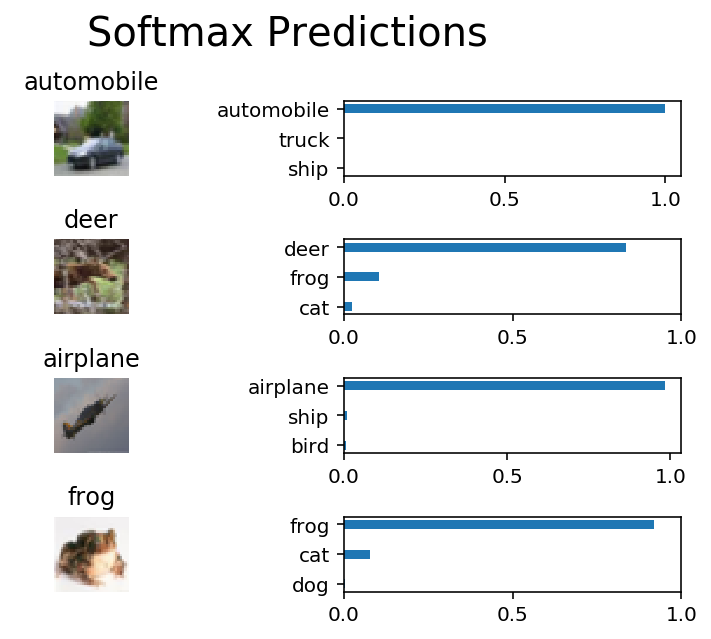

In [166]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import tensorflow as tf
import pickle
import helper
import random

# Set batch size if not already set
try:
    if batch_size:
        pass
except NameError:
    batch_size = 64

save_model_path = './image_classification'
n_samples = 4
top_n_predictions = 3

def test_model():
    """
    Test the saved model against the test dataset
    """

    test_features, test_labels = pickle.load(open('preprocess_test.p', mode='rb'))
    loaded_graph = tf.Graph()

    with tf.Session(graph=loaded_graph) as sess:
        # Load model
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)

        # Get Tensors from loaded model
        loaded_x = loaded_graph.get_tensor_by_name('x:0')
        loaded_y = loaded_graph.get_tensor_by_name('y:0')
        loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
        loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
        loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
        
        # Get accuracy in batches for memory limitations
        test_batch_acc_total = 0
        test_batch_count = 0
        
        for test_feature_batch, test_label_batch in helper.batch_features_labels(test_features, test_labels, batch_size):
            test_batch_acc_total += sess.run(
                loaded_acc,
                feed_dict={loaded_x: test_feature_batch, loaded_y: test_label_batch, loaded_keep_prob: 1.0})
            test_batch_count += 1

        print('Testing Accuracy: {}\n'.format(test_batch_acc_total/test_batch_count))

        # Print Random Samples
        random_test_features, random_test_labels = tuple(zip(*random.sample(list(zip(test_features, test_labels)), n_samples)))
        random_test_predictions = sess.run(
            tf.nn.top_k(tf.nn.softmax(loaded_logits), top_n_predictions),
            feed_dict={loaded_x: random_test_features, loaded_y: random_test_labels, loaded_keep_prob: 1.0})
        helper.display_image_predictions(random_test_features, random_test_labels, random_test_predictions)


test_model()

## Why 50-80% Accuracy?
You might be wondering why you can't get an accuracy any higher. First things first, 50% isn't bad for a simple CNN.  Pure guessing would get you 10% accuracy. However, you might notice people are getting scores [well above 80%](http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html#43494641522d3130).  That's because we haven't taught you all there is to know about neural networks. We still need to cover a few more techniques.
## Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook.  Save the notebook file as "dlnd_image_classification.ipynb" and save it as a HTML file under "File" -> "Download as".  Include the "helper.py" and "problem_unittests.py" files in your submission.